# Problem Statement -
You are a cab rental start-up company. You have successfully run the pilot project and
now want to launch your cab service across the country. You have collected the
historical data from your pilot project and now have a requirement to apply analytics for
fare prediction. You need to design a system that predicts the fare amount for a cab ride
in the city.



Data Set :
1) train_cab.zip
2) test.zip



Number of attributes:

· pickup_datetime - timestamp value indicating when the cab ride started.

· pickup_longitude - float for longitude coordinate of where the cab ride started.

· pickup_latitude - float for latitude coordinate of where the cab ride started.

· dropoff_longitude - float for longitude coordinate of where the cab ride ended.

· dropoff_latitude - float for latitude coordinate of where the cab ride ended.

· passenger_count - an integer indicating the number of passengers in the cab
  ride.


In [2]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [3]:
train = pd.read_csv('C:\\Users\\Ritu khurana\\Desktop\\Assigments\\Project_cab\\train_cab.csv')

In [4]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [6]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [7]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [8]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
train.shape

(16067, 7)

In [10]:
train.isna().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [11]:
#converting to proper data type
train['fare_amount']= train['fare_amount'].apply(pd.to_numeric, errors='coerce')

In [12]:
 
train[train['fare_amount']<0]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1.0
13032,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4.0


In [13]:
train[train['fare_amount'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
26,NaN,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0
69,NaN,2015-05-12 23:51:42 UTC,-73.954796,40.779335,-73.944931,40.780087,1.0
126,NaN,2013-09-17 04:22:00 UTC,-73.987210,40.729325,-73.931985,40.697207,1.0
168,NaN,2009-01-16 21:10:00 UTC,-73.994143,40.751193,-73.988897,40.759742,1.0
240,NaN,2009-06-20 19:28:37 UTC,-73.979345,40.776630,-73.973842,40.757074,1.0
305,NaN,2014-07-11 05:07:00 UTC,-73.951660,40.772657,-74.010583,40.721405,2.0
350,NaN,2014-09-05 15:23:00 UTC,-73.968260,40.765140,-73.961115,40.774882,6.0
413,NaN,2013-09-12 11:32:00 UTC,-73.982060,40.772705,-73.956213,40.771777,55.0
455,NaN,2014-07-03 01:34:00 UTC,-73.968087,40.755140,-73.952622,40.823312,5.0


In [14]:
train[train['passenger_count'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
31,22.54,2015-06-21 21:46:34 UTC,-74.010483,40.717667,-73.985771,40.660366,NaN
64,7.30,2011-11-07 10:47:40 UTC,-74.003919,40.753019,-73.992368,40.735362,NaN
82,8.50,2013-06-14 08:27:43 UTC,-73.953710,40.790813,-73.957015,40.777676,NaN
97,9.00,2014-12-07 12:26:00 UTC,-73.984977,40.752122,-74.000925,40.757982,NaN
112,35.00,2012-12-06 18:05:00 UTC,-73.953310,40.787772,-73.944352,40.719772,NaN
133,10.50,2012-02-03 13:46:35 UTC,-73.988006,40.737723,-73.965699,40.766095,NaN
150,17.30,2010-05-17 07:44:00 UTC,-73.950972,40.785633,-74.010240,40.720302,NaN
174,10.50,2015-02-27 07:50:56 UTC,-73.944023,40.775959,-73.955048,40.785080,NaN
195,16.00,2014-02-05 00:28:00 UTC,-73.996652,40.744495,-73.980253,40.737635,NaN
203,11.30,2012-04-25 20:39:00 UTC,-73.993973,40.746577,-74.005060,40.709365,NaN


In [15]:
train[train['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33 UTC,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00 UTC,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05 UTC,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05 UTC,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00 UTC,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00 UTC,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00 UTC,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29 UTC,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50 UTC,-73.988977,40.721068,-73.982368,40.732064,345.0


In [16]:
# to see rows where pickup_longitude equal to drropoff_longitude
train[train['pickup_longitude']==train['dropoff_longitude']]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
11,5.50,2012-12-24 11:24:00 UTC,0.000000,0.000000,0.000000,0.000000,3.0
15,5.00,2013-11-23 12:57:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0
26,NaN,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0
105,52.00,2009-03-25 00:08:52 UTC,-74.035839,40.747320,-74.035839,40.747320,1.0
124,8.00,2013-01-17 17:22:00 UTC,0.000000,0.000000,0.000000,0.000000,2.0
191,6.50,2014-01-08 21:55:58 UTC,-73.998488,40.726303,-73.998488,40.726303,1.0
192,3.70,2010-09-05 17:08:00 UTC,0.000000,0.000000,0.000000,0.000000,5.0
233,8.50,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,236.0
270,7.50,2012-08-25 01:53:42 UTC,-73.995892,40.746454,-73.995892,40.746454,1.0
273,8.10,2009-10-30 18:13:00 UTC,0.000000,0.000000,0.000000,0.000000,4.0


In [17]:
train[train['pickup_longitude']==train['dropoff_longitude']].count()

fare_amount          460
pickup_datetime      462
pickup_longitude     462
pickup_latitude      462
dropoff_longitude    462
dropoff_latitude     462
passenger_count      462
dtype: int64

In [18]:
#Drop rows where pickup_longitude equal to drropoff_longitude
train.drop(train[train['pickup_longitude']==train['dropoff_longitude']].index,inplace=True)

In [19]:
#replace 0 with NA in the variables
train['fare_amount']= train['fare_amount'].apply(pd.to_numeric, errors='coerce')
train['fare_amount']= train['fare_amount'].replace({0:np.nan})
train['passenger_count']=train['passenger_count'].fillna(0)
train['passenger_count']= train['passenger_count'].astype(int)
train['passenger_count']=train['passenger_count'].replace({0: np.nan})
train['pickup_longitude']= train['pickup_longitude'].replace({0:np.nan})
train['pickup_latitude']= train['pickup_latitude'].replace({0:np.nan})
train['dropoff_longitude']= train['dropoff_longitude'].replace({0:np.nan})
train['dropoff_latitude']= train['dropoff_latitude'].replace({0:np.nan})

In [20]:
train.isna().sum()

fare_amount           24
pickup_datetime        0
pickup_longitude      12
pickup_latitude       12
dropoff_longitude     11
dropoff_latitude       9
passenger_count      112
dtype: int64

In [21]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [22]:
#creaet a function to calculate missing values
def missingval(data):
    missing_val = pd.DataFrame(data.isnull().sum())
    
#Reset index
    missing_val = missing_val.reset_index()

#Rename variable
    missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'count'})

#Calculate percentage
    missing_val['Missing_percentage'] = (missing_val['count']/len(data)*100)

#descending order
    missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
    print(missing_val)

In [23]:
missingval(train)

           Variables  count  Missing_percentage
0    passenger_count    112            0.717719
1        fare_amount     24            0.153797
2   pickup_longitude     12            0.076898
3    pickup_latitude     12            0.076898
4  dropoff_longitude     11            0.070490
5   dropoff_latitude      9            0.057674
6    pickup_datetime      0            0.000000


In [24]:
df = train.copy()
train = df.copy()


In [ ]:
#actual--train['pickup_longitude'].loc[50]==-73.985582
#KNN----73.97770799999999
#median-   -73.9820605
#mean   -73.91160183651274

In [ ]:
#fare_amount =9.7
#Mean-15.127673940949794
#median-8.5
#knn- 7.5

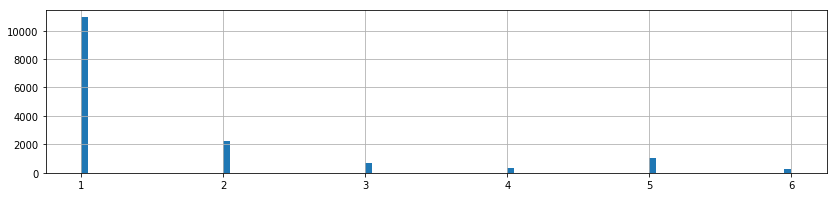

In [25]:
train[train['passenger_count']<=6]['passenger_count'].hist(bins=100, figsize=(14,3))

In [26]:
#Since Median is the best method, we impute missing values with median

train['pickup_longitude'] = train['pickup_longitude'].fillna(train['pickup_longitude'].median())
train['pickup_latitude'] = train['pickup_latitude'].fillna(train['pickup_latitude'].median())
train['dropoff_longitude'] = train['dropoff_longitude'].fillna(train['dropoff_longitude'].median())
train['dropoff_latitude'] = train['dropoff_latitude'].fillna(train['dropoff_latitude'].median())

#for category variables we impute with mode
train['passenger_count'] = train['passenger_count'].fillna(int(train['passenger_count'].mode()))

In [27]:
train.isna().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

In [28]:
train.shape

(15605, 7)

In [29]:
#Imputing the NAs in target variables will bias the model, hence remove them
train=train.dropna()

In [30]:
train.shape

(15581, 7)

In [31]:
#conert into proper data type
dtype_data={'fare_amount' : 'float','passenger_count': 'int'}
train=train.astype(dtype_data)


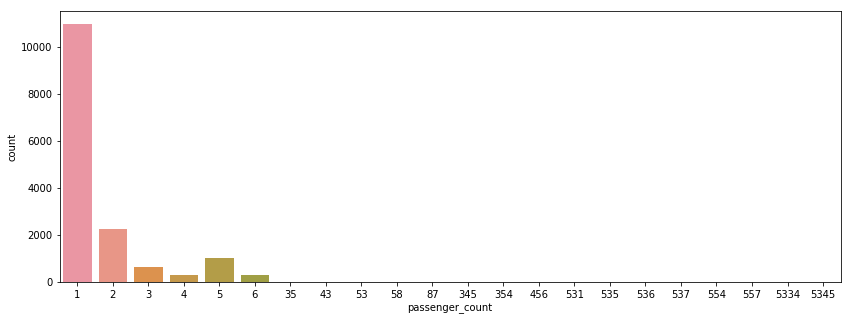

In [32]:
# plot of the passenger_count
plt.figure(figsize=(14,5))
sns.countplot(x='passenger_count', data=train)

In [33]:
train['passenger_count'].value_counts()

1       11015
2        2263
5        1018
3         656
4         318
6         294
43          2
535         1
354         1
536         1
345         1
537         1
58          1
35          1
554         1
87          1
531         1
5345        1
5334        1
53          1
557         1
456         1
Name: passenger_count, dtype: int64

Text(0.5, 1.0, 'Histogram')

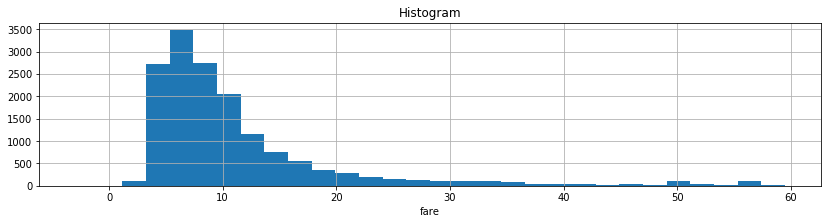

In [34]:
# plot of fare_amount wwhich are in range
train[train['fare_amount']<60]['fare_amount'].hist(bins=30, figsize=(14,3))
plt.xlabel('fare')
plt.title('Histogram')

In [35]:
train[train['fare_amount']>60].count()

fare_amount          32
pickup_datetime      32
pickup_longitude     32
pickup_latitude      32
dropoff_longitude    32
dropoff_latitude     32
passenger_count      32
dtype: int64

In [36]:
train[train['fare_amount']<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.9,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,-2.5,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,-3.0,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4


# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ed0fd160>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ed2ce9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ed2c2f60>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ed2cee10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ed2d9400>],
 'means': []}

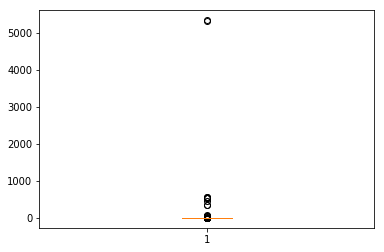

In [37]:
# #Plot boxplot to visualize Outliers
  
plt.boxplot(train['passenger_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ed27c0b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ed322e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ed3226a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ed32d7b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ed32db00>],
 'means': []}

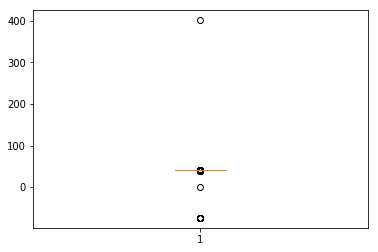

In [38]:
plt.boxplot(train['pickup_latitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5ed0270b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5ed5112e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5ed506860>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5ed511978>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5ed511cc0>],
 'means': []}

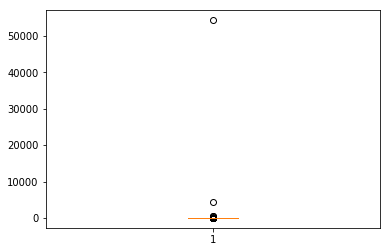

In [39]:
plt.boxplot(train['fare_amount'])

In [40]:
cnames = ['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']

In [41]:
#Detect and delete outliers from data
for i in cnames:
    print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    train.loc[train[i] < min,i] = np.nan
    train.loc[train[i] > max,i] = np.nan
    

pickup_longitude
-74.02868999999998
-73.93189000000001
pickup_latitude
40.68979549999999
40.814575500000004
dropoff_longitude
-74.0301125
-73.92680449999997
dropoff_latitude
40.6882895
40.816309499999996


In [42]:
train.isna().sum()

fare_amount            0
pickup_datetime        0
pickup_longitude     779
pickup_latitude      497
dropoff_longitude    893
dropoff_latitude     737
passenger_count        0
dtype: int64

In [43]:
# fare_amount at the higher end are converted to na
train.loc[train['fare_amount']<0 , 'fare_amount']=np.nan
train.loc[train['fare_amount'] > 60, 'fare_amount']=np.nan


In [44]:
train.isna().sum()

fare_amount           35
pickup_datetime        0
pickup_longitude     779
pickup_latitude      497
dropoff_longitude    893
dropoff_latitude     737
passenger_count        0
dtype: int64

In [45]:
#there are few passenger counts that are greater than 8. convert them intoNAN
train.loc[train['passenger_count'] > 6,'passenger_count'] = np.nan

In [46]:
train.isna().sum()

fare_amount           35
pickup_datetime        0
pickup_longitude     779
pickup_latitude      497
dropoff_longitude    893
dropoff_latitude     737
passenger_count       17
dtype: int64

In [47]:
#Since Median is the best method, we impute missing values with Median

train['pickup_longitude'] = train['pickup_longitude'].fillna(train['pickup_longitude'].median())
train['pickup_latitude'] = train['pickup_latitude'].fillna(train['pickup_latitude'].median())
train['dropoff_longitude'] = train['dropoff_longitude'].fillna(train['dropoff_longitude'].median())
train['dropoff_latitude'] = train['dropoff_latitude'].fillna(train['dropoff_latitude'].median())

#for category variables we impute with mode
train['passenger_count'] = train['passenger_count'].fillna(int(train['passenger_count'].mode()))


In [48]:
train.isna().sum()


fare_amount          35
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

In [49]:
# droping na as fare_amount is target variable
train=train.dropna()

In [50]:
train.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [51]:
train.shape

(15546, 7)

In [52]:
# At train.iloc[1264] in pickup_datetime=43, which is not in proper format so imputing this with na 
train.iloc[1264]= np.nan

In [53]:
# removing the row with pickup_datetime=43 
train.dropna(inplace=True)

In [54]:
# function to calculate distance using latitude and longitude
def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [55]:
# Calculating new variable called distance
train['distance'] = distance(train['pickup_latitude'],train['pickup_longitude'],train['dropoff_latitude'],train['dropoff_longitude'])


In [56]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,4.5,2009-06-15 17:26:21 UTC,-73.982653,40.721319,-73.981630,40.712278,1.0,1.009317
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,8.452786
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389961
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2.800149
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999784


In [57]:
# Converting  pickup_datetime to pandas datetime 
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'], format= "%Y-%m-%d %H:%M:%S UTC")

In [58]:
# Creating new variable using pandas datetime 
train['year'] = train.pickup_datetime.apply(lambda t: t.year)

train['hour'] = train.pickup_datetime.apply(lambda t: t.hour)

In [59]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,hour
0,4.5,2009-06-15 17:26:21,-73.982653,40.721319,-73.981630,40.712278,1.0,1.009317,2009,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,8.452786,2010,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389961,2011,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2.800149,2012,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999784,2010,7


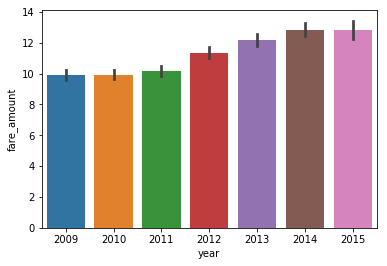

In [60]:
sns.barplot(x='year', y='fare_amount', data=train)

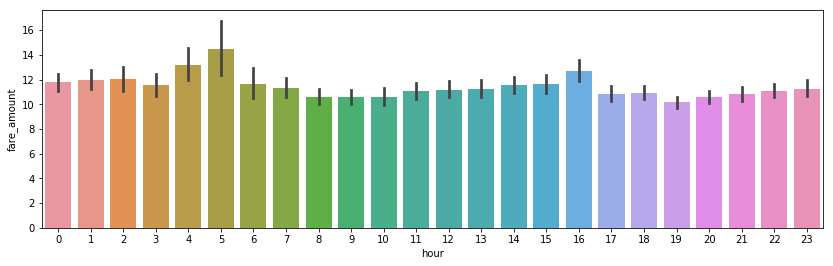

In [61]:
plt.figure(figsize=(14,4))
sns.barplot(x='hour', y='fare_amount', data=train)

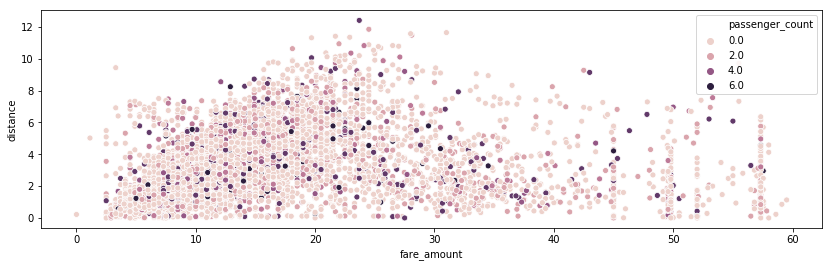

In [62]:
plt.figure(figsize=(14,4))
sns.scatterplot(x='fare_amount',y ='distance', data=train,hue='passenger_count')

In [63]:
cnames1=['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance',
       'year', 'hour']

In [64]:
df_corr = train.loc[:,cnames1]

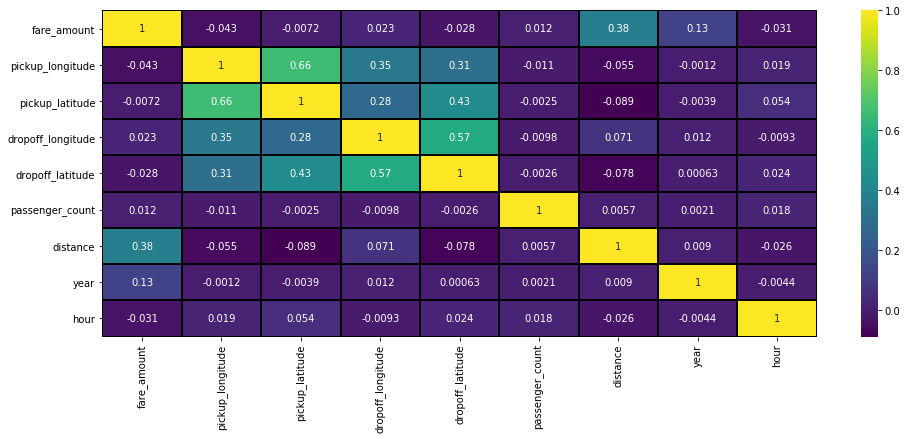

In [65]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(16, 6))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='viridis',linewidths=1,linecolor='black',annot=True)


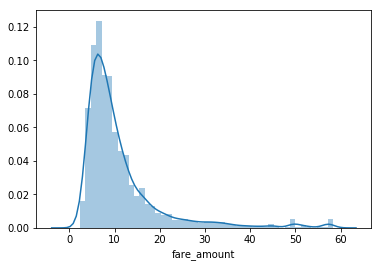

In [66]:
sns.distplot(train['fare_amount'])

# Model Development

In [67]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [68]:
train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance',
       'year', 'hour'],
      dtype='object')

In [69]:
X=train[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count','distance','year','hour']]

In [70]:
y=train['fare_amount']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [72]:
dtree = DecisionTreeRegressor()

In [73]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [74]:
predictions = dtree.predict(X_test)

In [75]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [76]:
MAPE(y_test, predictions)

32.413252379132025

In [77]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor



In [78]:
RF_model = RandomForestRegressor(n_estimators = 23).fit(X_train,y_train)

In [79]:
RF_Predictions = RF_model.predict(X_test)

In [80]:
MAPE(y_test, RF_Predictions)

25.39546038007886

##### function to increment n_estimators one by one and calculate error rate.. 

#error_rate=[]
#for i in range(1,40):
#    ran =RandomForestRegressor(n_estimators=i)
#    ran.fit(X_train,y_train)
#    pred_i=ran.predict(X_test)
#    error_rate.append(np.mean(np.abs((y_test - pred_i) / y_test))*100)


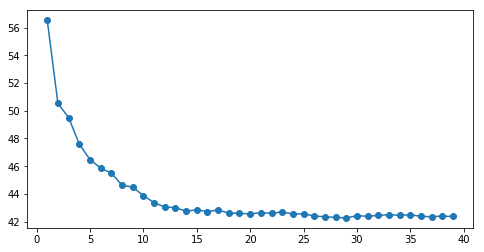

In [126]:
# plot of error rate by the function

#plt.figure(figsize=(8,4))
#plt.plot(range(1,40),error_rate,marker='o')

In [80]:
from sklearn.neighbors import KNeighborsRegressor



In [81]:
KNN_model = KNeighborsRegressor(n_neighbors = 14)

In [82]:
KNN_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                    weights='uniform')

In [83]:
KNN_Predictions = KNN_model.predict(X_test)

In [84]:
MAPE(y_test, KNN_Predictions)

42.75859923591262

In [88]:
# function to increment n_neighbors one by one and calculate error rate.. 

#error_rate=[]
#for i in range(1,40):
#    knn =KNeighborsRegressor(n_neighbors=i)
#    knn.fit(X_train,y_train)
#    pred_i=knn.predict(X_test)
#    error_rate.append(np.mean(np.abs((y_test - pred_i) / y_test))*100)


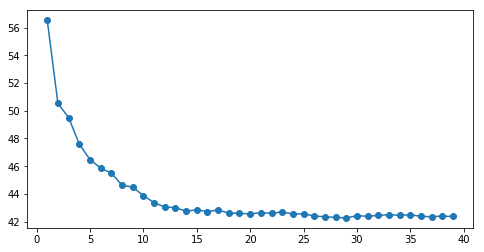

In [127]:
# plot of error rate by the function
#plt.figure(figsize=(8,4))
#plt.plot(range(1,40),error_rate,marker='o')

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()

In [87]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
pred =lm.predict(X_test)

In [89]:
MAPE(y_test, pred)

42.6133964475484

# test data

In [81]:
final = pd.read_csv('C:\\Users\\Ritu khurana\\Desktop\\Assigments\\Project_cab\\test.csv')

In [82]:
final.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [83]:
final.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [84]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [85]:
final.isna().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [86]:
final[final['pickup_longitude']==final['dropoff_longitude']].count()

pickup_datetime      86
pickup_longitude     86
pickup_latitude      86
dropoff_longitude    86
dropoff_latitude     86
passenger_count      86
dtype: int64

In [87]:
final.drop(final[final['pickup_longitude']==final['dropoff_longitude']].index,inplace=True)

In [88]:
final['distance'] = distance(final['pickup_latitude'],final['pickup_longitude'],final['dropoff_latitude'],final['dropoff_longitude'])


In [89]:
final['pickup_datetime']=pd.to_datetime(final['pickup_datetime'], format= "%Y-%m-%d %H:%M:%S UTC")

In [90]:
final['year'] = final.pickup_datetime.apply(lambda t: t.year)
final['hour'] = final.pickup_datetime.apply(lambda t: t.hour)

In [91]:
RF_model = RandomForestRegressor(n_estimators = 24).fit(X_train,y_train)

In [92]:
final.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance',
       'year', 'hour'],
      dtype='object')

In [93]:
Xf_test =final[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','passenger_count', 'distance',
       'year', 'hour']]

In [94]:
final['fare_amount']= RF_model.predict(Xf_test)

In [95]:
final.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,hour,fare_amount
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323989,2015,13,10.670833
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.426114,2015,13,10.191667
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618822,2011,11,4.233333
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961648,2012,21,9.725000
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.388992,2012,21,14.908333


In [96]:
#Writing final to a csv file
final.to_csv('C:\\Users\\Ritu khurana\\Desktop\\Assigments\\Project_cab\\final.csv', columns=['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','passenger_count', 'distance','year', 'hour','fare_amount'], index=False)